###### Ian Wafer
###### 29/11/19

# Introduction<a id="Intro"></a>

Tipping also know as gratuity is the act of giving a person a sum of money for services rendered in additon to the bill. This is generally only in the service industry and depending on the country the tipping culture can range from an expected minimum tip of 20% as seen in America to being insulted if any tip is offered as seen in Japan.

The tips dataset was created in the early 1990s over a period of two and a half months by an employee of a national chain restaurant located in a suburban mall in America. The employee recorded the following variables- total bill, tip, sex, smoker, day, time and size. 

Since tips can be influenced by a number of different factors we can use this collected data to investigate the variables that affect the tip size and to what degree. In the below breakdowns we will explore various relationships and explain them.

The relationships we want to explore in relation to tip amount are shown below in the table of contents.

# Table Of Contents

* [Introduction](#Intro)
* [1. Data Description](#DataDe)
* [2. Relationships](#Rela)
    * [2.1 Total Bill & Tips](#Tot+Tips)
    * [2.2 Time](#Time)
    * [2.3 Day](#Day)
    * [2.4 Sex](#Sex)
    * [2.5 Smoker](#Smoker)


In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

# Set default grid style for plots
sns.set(style='darkgrid')

# Shorten code to read the tips dataset
tips = sns.load_dataset('tips', delimiter=',')

To ensure the dataset loaded correctly we will print the first and last ten lines of the dataset and check for any anomolies.

In [65]:
# Show the first 10 lines of the dataset
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [66]:
# Show the last 10 lines of the dataset
tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# 1. Data Description<a id="DataDe"></a>

Now that we have verified the dataset loaded correctly we'll take a brief look at at a breakdown of the data containing floats. Form this we can see the averages, standard deviations, minimums and incremental increases of 25% up to the maximum amount for the columns total bill, tip and size.This in itself doesn't show us any relationships between the variables but gives us an idea of the range of numbers to expect.  

At this point we'll also tidy up the column headings for future reference.

In [67]:
# Brief description of all the data containing floats
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Below we tidy up the column headings just for convenience and better axis labelling without requireing editing on every individual plot.

In [68]:
# Sourced from https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
# Clean up column headings
tips.columns = ['Total Bill ($)', 'Tip ($)', 'Sex', 'Smoker', 'Day', 'Time', 'Size']
tips.head(1)

,Total Bill ($),Tip ($),Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [69]:
# Sourced from https://stackoverflow.com/a/22391554
# Count all males and females in the datasets
tips['Sex'].value_counts()

Male      157
Female     87
Name: Sex, dtype: int64

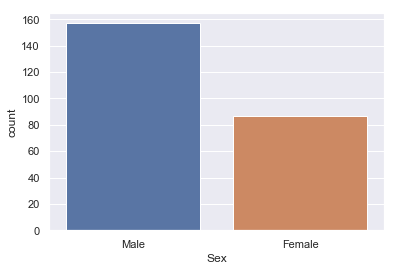

In [70]:
sns.countplot(x='Sex', data=tips)

Here we can see there is almost double the amount of males to females paying the bills at the restaurant with 157 males and just 87 females paying. This would be important to conisder for sample sizing purposes but the dataset has a large enough sample from both sexes to continue the analysis and expect an accurate representation. 

Now to look at the attendance of the restaurant each day we have data for.

In [71]:
# Give a count of the amount of bills by day
tips['Day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: Day, dtype: int64

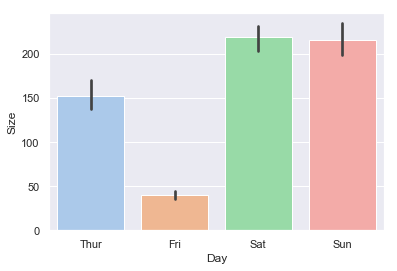

In [72]:
# Sourced from https://www.codecademy.com/articles/seaborn-design-ii
# Plot the total sum of attendence determined by group size by day
sns.barplot(x='Day', y='Size', data=tips, palette='pastel', estimator=sum)

From the aove plot we can see the busiest days of the week are Saturday and Sunday with Thursday not far behind. Friday appears to be the quietist day with condierably less people atending at less than a quarter of it's busiest periods.

Now to take a look at time served and also the time served broken down into each day and bill amount.

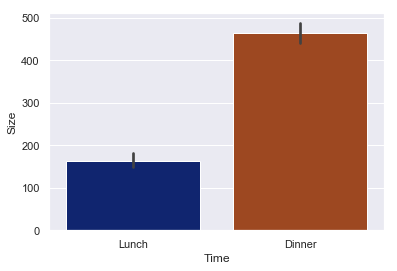

In [73]:
# Plot the total amount of people eating lunch/dinner
sns.barplot(x="Time", y="Size", data=tips, palette='dark', estimator=sum)

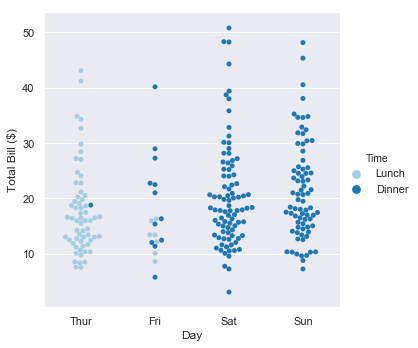

In [74]:
# Plot total bill against day and colour by time
sns.catplot(x='Day', y='Total Bill ($)', hue='Time', palette='Paired', kind='swarm', data=tips)

From the above two plots we can see that there are much more dinners served than lunches and that while lunch and dinner are served on Thursday and Friday, dinner is exclusively served on the Saturday and Sunday. Dinners account for more than 3 times the amount of meals served than lunches.

***

# 2. Relationships<a id="Rela"></a>

### 2.1 Total Bill & Tips<a id="Tot+Tips"></a>

The first relationship we will explore is between total bill and tip and determine if there is a trend. To do this we will use a plot and determine if the slope is in a positive direction as the total bill value increases. This would gives us an indication of a positive correlation between total bill and tips.

The values of the slope and constant respectively are [0.10502452 0.92026961]


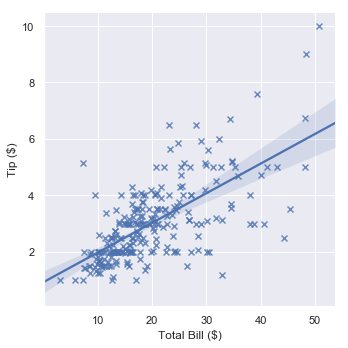

In [75]:
# Calculate best values for m (slope) and c (constant)
totallist = tips[tips.columns[0]].tolist() # Convert Total Bills column into a list
tiplist = tips[tips.columns[1]].tolist() # Convert Tips column into a list

print('The values of the slope and constant respectively are', np.polyfit(totallist, tiplist, 1)) 

# Plot relationsip with regression line shown with 95% confidence interval
sns.lmplot(x='Total Bill ($)', y='Tip ($)', markers='x', data=tips)

From this graph we can see that the general trend for tipping amount increases with the total bill within certain limits with exceptions in certain cases. This can be seen by the regression model line plotted with the 95% confidence interval to either side and is further shown by the positive value of the slope and constant calculated using the polyfit function. This verifies the expectation that tipping is usually done as a percentage of the total bill amount and shows that the majority of the time we can expect a higher tip for a higher bill.

***

### 2.2 Time<a id="Time"></a>

Next we will look at breaking down this data further to determine relationships in greater depth. 

Below is a plot of the relationship of the above broken down into the time of day, divided by colour into the relevant sex the datapoints relate to with their sizes dictated by the size category of the dataset and also a plot of the relationship of tip amount with size and time.

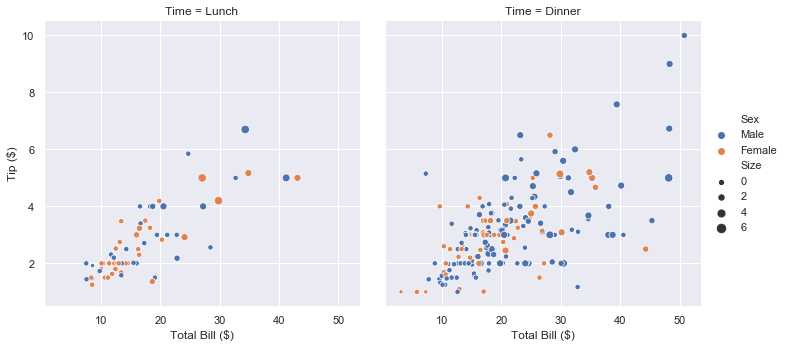

In [76]:
# Plot total bill against tips coloured by sex with marker size dictated by group size
sns.relplot(x='Total Bill ($)', y='Tip ($)', hue='Sex', col='Time', data=tips, size='Size')

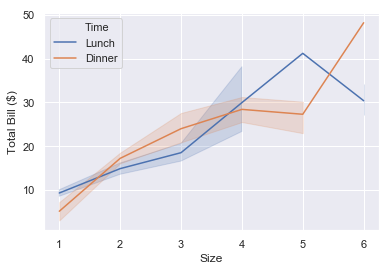

In [77]:
sns.lineplot(x='Size', y='Total Bill ($)', hue='Time', data=tips)

The above plots show that there are far more dinners than lunches and that the dinner total bill more likely to be higher in value than the lunch bill due to the difference in quantities. We can also see that the range between \\$10-40 total bills appear evenly split between the sexs while the higher total bills and therefore larger tips (due to the relationship shown earlier) has only the males present. This could also be due to the fact that male have twice the representation than females in this particular dataset. We can also see that the larger size tends to have a higher total bill. 

***

### 2.3 Day<a id="Day"></a>

From the plot above in section 2 we can see that the Saturday and Sunday is the busiest time of the week. This has been plotted again below for convenience. 

We will now check if this has any signifiatn impact on tips received and also if people generally tip more on the busier days.

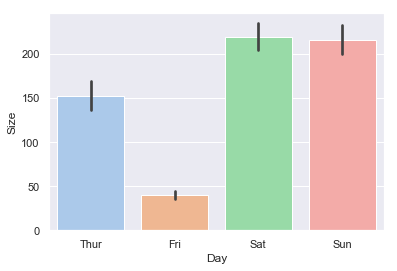

In [78]:
sns.barplot(x='Day', y='Size', data=tips, palette='pastel', estimator=sum)

### 2.4 Sex<a id="Sex"></a>

Below we look at the relationship between average, minimum and maximum tips between the sex and the size categories. We will also compare this information to determine if one sex is more genorous on tipping amounts.

In [79]:
# Breakdown of categories of sex with respect to average total bill and tip amount
sexmean = tips.groupby(['Sex']).mean()
print('Average Tips By Sex')
sexmean.round(2)

Average Tips By Sex


,Total Bill ($),Tip ($),Size
Sex,,,
Male,20.74,3.09,2.63
Female,18.06,2.83,2.46


From the above we can see that the average male tip of \\$3.09 is higher than the average female tip of \\$2.83 but the male average total bill is also higher. To determine which sex is the higher tipper we will need to compare like for like and break down the average total bill to compare to the average tip. 

In [80]:
print('Average Tip As A Percentage Of Total Bill')
print(((sexmean['Tip ($)'] / sexmean['Total Bill ($)'])*100).round(2))

Average Tip As A Percentage Of Total Bill
Sex
Male      14.89
Female    15.69
dtype: float64


As we can see now initial perceptions can be deceiveing. It appears female tippers average out to tip sligthly more than their male counterparts. Now to investigate whether this is due to a statistical anomaly from a few outliers or they are statistically more likely to tip more.

In [81]:
# Sourced from https://stackoverflow.com/a/37840494
# Breakdown of categories of sex and size with respect to average total bill and tip amount
sexmean = tips.groupby(['Sex', 'Size']).mean()
sexmean.round(2)

Total Bill ($)  Tip ($)
Sex    Size                         
Male   1               8.58     1.92
       2              17.10     2.61
       3              24.29     3.48
       4              28.08     4.17
       5              30.12     3.75
       6              41.24     5.85
Female 1               6.80     1.28
       2              15.34     2.53
       3              21.55     3.25
       4              30.28     4.02
       5              29.85     5.14
       6              28.42     4.60

Below we have the minimum tip received by sex and size.

In [94]:
# Minimum tip size by sex and size of party
sexmin = tips.groupby(['Sex', 'Size'])['Tip ($)'].min()
sexmin.unstack().round(2)

Size,1,2,3,4,5,6
Sex,,,,,,
Male,1.92,1.0,1.66,2.00,2.00,5.0
Female,1.00,1.0,1.36,2.45,5.14,4.2


Below we have the maximum tip received by sex and size.

In [98]:
# Maximum tip size by sex and size of party
sexmax = tips.groupby(['Sex', 'Size'])['Tip ($)'].max()
sexmax.unstack().round(2)

Size,1,2,3,4,5,6
Sex,,,,,,
Male,1.92,5.85,10.0,9.0,5.00,6.7
Female,1.83,5.00,6.5,5.2,5.14,5.0


And finally we have the average tip as a percentage of the total bill received broken down by sex and size.

In [100]:
sexsizemean = tips.groupby(['Sex', 'Size']).mean()
((sexsizemean['Tip ($)'] / sexsizemean['Total Bill ($)'])*100).unstack().round(2)

Size,1,2,3,4,5,6
Sex,,,,,,
Male,22.38,15.28,14.31,14.86,12.45,14.19
Female,18.78,16.48,15.08,13.28,17.22,16.18


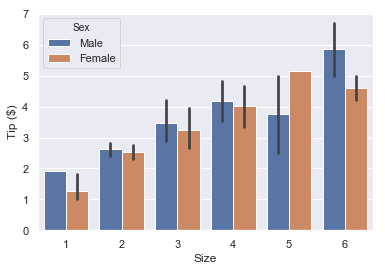

In [83]:
sns.barplot(x='Size', y='Tip ($)', hue='Sex', data=tips)

Text(0.5, 1.0, 'Regression Line For Sexes')

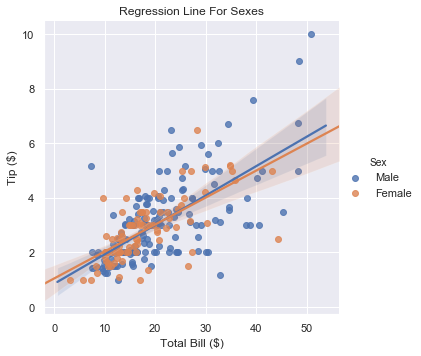

In [84]:
# Plot relationsip with regression line shown with 95% confidence interval for both sexes
sns.lmplot(x='Total Bill ($)', y='Tip ($)', hue='Sex', data=tips)

# Source from https://stackoverflow.com/a/48773646
plt.title('Regression Line For Sexes')

We can see that males and females of similar party size tip roughly the same percentage with females giving a slightly higher percentage than males as the party size increases. This confirms our above hypthesis from the initial overall dataset check that females tend to tip more. However from the graph shown it would appear that total tip size tends to be higher for the males due to males being more likely to have a higher total bill amount which would lead to a higher tip even with an overall lower percentage. As can be seen by the final plot with the regression line shown the difference between the sexes is very small.

The percentage of amount tipped for both the sexes trends towards roughly 17%  ± 5%.

The difference between the minimum and maximum bills is very small or non existant at size 1, 5 and 6 for both sexs with a much greater differnce produced in the centre size values of 2, 3 and 4. This could be due to the small sample size attained for these sizes.

In [85]:
# Calculate best values for m (slope) and c (constant)
sizelist = tips[tips.columns[6]].tolist() # Convert Size column into a list
tiplist = tips[tips.columns[1]].tolist() # Convert Tips column into a list

print('The values of the slope and constant respectively are', np.polyfit(sizelist, tiplist, 1)) 

The values of the slope and constant respectively are [0.71182064 1.16913303]


The above breakdown shows us that group size does have an affect on the tip amount. We can see that as the group size increases so too does the tip amount with the slope given in a positive direction.

***

### 2.5 Smokers<a id="Smoker"></a>

Next is to determine if there is any relationship in tip size with smokers. 

In [86]:
# Determine percentage of bill size that was tipped and round it to the closest whole number.
smokermean = tips.groupby(['Smoker', 'Size']).mean()
smokermean.round(2)

Total Bill ($)  Tip ($)
Smoker Size                         
Yes    1               5.82     1.46
       2              17.96     2.71
       3              28.19     4.10
       4              30.61     3.99
       5              29.30     2.50
       6                NaN      NaN
No     1               8.66     1.42
       2              15.34     2.49
       3              21.01     3.07
       4              27.77     4.20
       5              30.58     5.05
       6              34.83     5.22

In [87]:
# Compare the tip percentage of smokers with non smokers
((smokermean['Tip ($)'] / smokermean['Total Bill ($)'])*100).unstack().round(0)

Size,1,2,3,4,5,6
Smoker,,,,,,
Yes,25.0,15.0,15.0,13.0,9.0,NaN
No,16.0,16.0,15.0,15.0,17.0,15.0


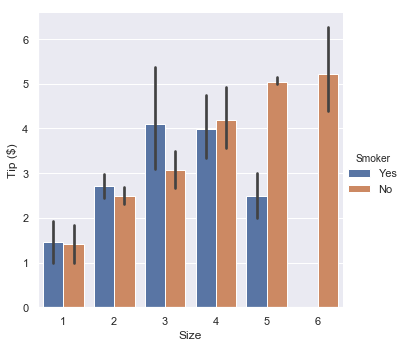

In [88]:
sns.catplot(x='Size', y='Tip ($)', hue='Smoker', data=tips, kind='bar')

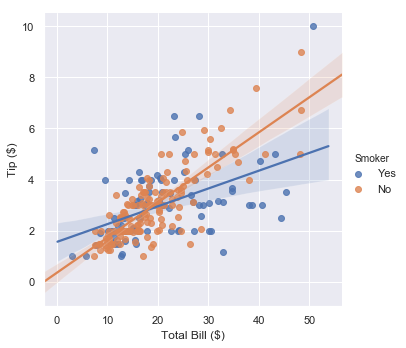

In [89]:
sns.lmplot(x='Total Bill ($)', y='Tip ($)', hue='Smoker', data=tips)

From the above data we can see that with the exception of group size being equal to 1 that all party sizes tip more as a non smoker. Again we can see from the plot shown that total tip amount is more in most cases for the smoker but this is also due to the fact that the smokers have a higher average total bill than the non-smokers.

***



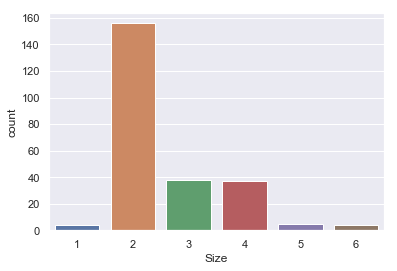

In [90]:
sns.countplot(x='Size', data=tips)

Source-https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-1-29c9478a8700 accessed 2/11/2019
       https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ accessed 2/11/2019
       https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts accessed 2/11/2019
       https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html accessed 2/11/2019
       https://seaborn.pydata.org/tutorial.html accessed 11/11/2019
       https://www.dataquest.io/blog/jupyter-notebook-tutorial/ accessed 12/11/2019